### Topics for today
1.Introduction to Deep Learning

2.Neural Networks

3.Case Studies

4.ML vs. DL

5.Deep Learning Libraries

6.How do Neural Networks learn?

7.Backpropagation

#### Introduction to Deep Learning
1. Deep Learning is Machine Learning inspired by Neurons in a human brain
2. Deep Learning can learn complex patterns
3. Deep Learning can handle large amount of data
4. Applications of Deep Learning reach far and wide and it is the most popular technology of 20th Century

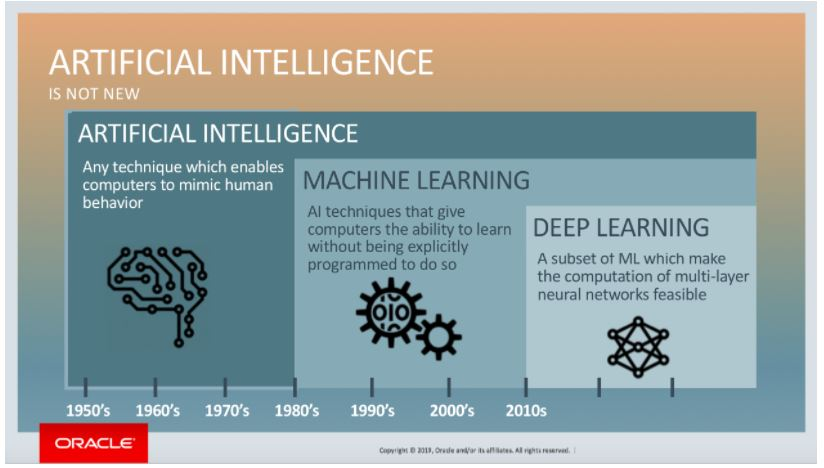

In [1]:
from IPython.display import Image
Image("./dlimage1.jpg")

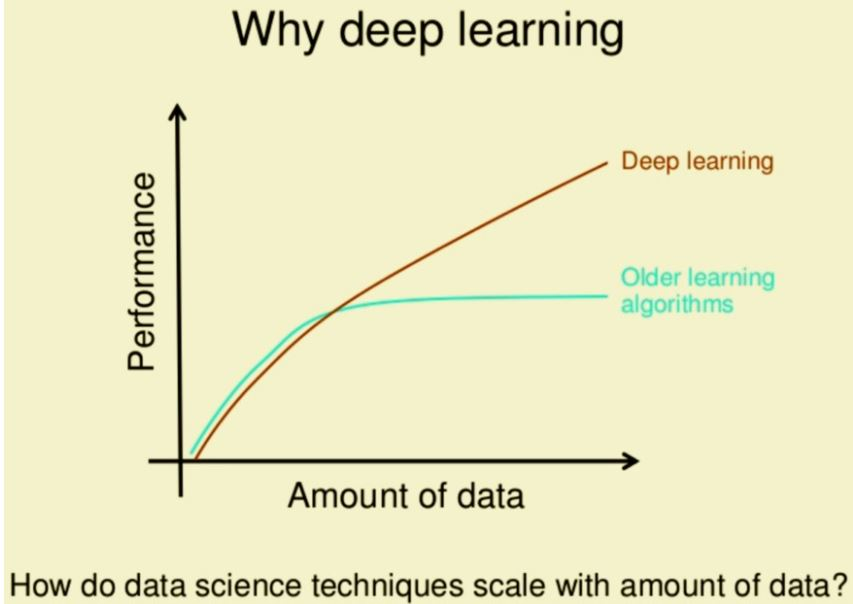

In [2]:
Image("./dlimage2.jpg")

### ML vs DL
1. Finding Complex Relations between variables happens in DL and ML needs feature engineering to improve model.
2. DL can handle large amount of data
3. DL can handle unstructured data like text and images.

### DL libraries
1. Pytorch - facebook(used by academicians and researchers)
2. Tensorflow - Google(used in industry a lot. easy to deploy)
3. Keras - API for using Tensorflow. Easy to use for beginners but has limited features of Tensorflow
4. Theano,Lua,Torch etc.

### Keras Demo - Regression

In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
from tensorflow import keras
from tensorflow.keras import layers

In [2]:
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

In [3]:
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.utils import to_categorical

In [4]:
#read in training data
train_df = pd.read_csv('./hourly_wages_data.csv')

#view data structure
train_df.head()

,wage_per_hour,union,education_yrs,experience_yrs,age,female,marr,south,manufacturing,construction
0,5.10,0,8,21,35,1,1,0,1,0
1,4.95,0,9,42,57,1,1,0,1,0
2,6.67,0,12,1,19,0,0,0,1,0
3,4.00,0,12,4,22,0,0,0,0,0
4,7.50,0,12,17,35,0,1,0,0,0


In [6]:
#create a dataframe with all training data except the target column
train_X = train_df.drop(columns=['wage_per_hour'])

#check that the target variable has been removed
train_X.head()

,union,education_yrs,experience_yrs,age,female,marr,south,manufacturing,construction
0,0,8,21,35,1,1,0,1,0
1,0,9,42,57,1,1,0,1,0
2,0,12,1,19,0,0,0,1,0
3,0,12,4,22,0,0,0,0,0
4,0,12,17,35,0,1,0,0,0


In [7]:
#create a dataframe with only the target column
train_y = train_df[['wage_per_hour']]

#view dataframe
train_y.head()

,wage_per_hour
0,5.10
1,4.95
2,6.67
3,4.00
4,7.50


In [15]:
#create model
model = Sequential()

#get number of columns in training data
n_cols = train_X.shape[1]

#add model layers
model.add(Dense(10, activation='relu', input_shape=(n_cols,)))
model.add(Dense(10, activation='relu'))
model.add(Dense(1))

#compile model using mse as a measure of model performance
model.compile(optimizer='adam', loss='mean_squared_error')

In [16]:
#set early stopping monitor so the model stops training when it won't improve anymore
early_stopping_monitor = EarlyStopping(patience=3)

In [17]:
#train model
model.fit(train_X, train_y, validation_split=0.2, epochs=30, callbacks=[early_stopping_monitor])

Train on 427 samples, validate on 107 samples
Epoch 1/30
427/427 [==============================] - 1s 2ms/sample - loss: 140.1567 - val_loss: 199.1331
Epoch 2/30
427/427 [==============================] - 0s 263us/sample - loss: 74.7712 - val_loss: 123.4975
Epoch 3/30
427/427 [==============================] - 0s 231us/sample - loss: 46.1325 - val_loss: 85.3622
Epoch 4/30
427/427 [==============================] - 0s 282us/sample - loss: 38.0606 - val_loss: 70.4093
Epoch 5/30
427/427 [==============================] - 0s 266us/sample - loss: 36.4541 - val_loss: 67.4248
Epoch 6/30
427/427 [==============================] - 0s 239us/sample - loss: 35.7183 - val_loss: 65.4476
Epoch 7/30
427/427 [==============================] - 0s 235us/sample - loss: 34.8238 - val_loss: 65.2632
Epoch 8/30
427/427 [==============================] - 0s 231us/sample - loss: 34.1001 - val_loss: 65.3016
Epoch 9/30
427/427 [==============================] - 0s 224us/sample - loss: 33.1503 - val_loss: 62.8945

In [18]:
#training a new model on the same data to show the effect of increasing model capacity

#create model
model_mc = Sequential()

#add model layers
model_mc.add(Dense(200, activation='relu', input_shape=(n_cols,)))
model_mc.add(Dense(200, activation='relu'))
model_mc.add(Dense(200, activation='relu'))
model_mc.add(Dense(1))

#compile model using mse as a measure of model performance
model_mc.compile(optimizer='adam', loss='mean_squared_error')


In [19]:
#train model
model_mc.fit(train_X, train_y, validation_split=0.2, epochs=30, callbacks=[early_stopping_monitor])

Train on 427 samples, validate on 107 samples
Epoch 1/30
427/427 [==============================] - 1s 2ms/sample - loss: 38.2896 - val_loss: 53.8960
Epoch 2/30
427/427 [==============================] - 0s 218us/sample - loss: 21.9093 - val_loss: 32.1939
Epoch 3/30
427/427 [==============================] - 0s 248us/sample - loss: 19.8443 - val_loss: 43.2656
Epoch 4/30
427/427 [==============================] - 0s 262us/sample - loss: 20.1227 - val_loss: 32.0568
Epoch 5/30
427/427 [==============================] - 0s 229us/sample - loss: 21.7729 - val_loss: 32.6574
Epoch 6/30
427/427 [==============================] - 0s 262us/sample - loss: 19.7551 - val_loss: 29.0513
Epoch 7/30
427/427 [==============================] - 0s 229us/sample - loss: 19.4475 - val_loss: 33.1147
Epoch 8/30
427/427 [==============================] - 0s 229us/sample - loss: 19.0144 - val_loss: 34.6340
Epoch 9/30
427/427 [==============================] - 0s 252us/sample - loss: 18.8334 - val_loss: 30.3928


### Keras Demo - Classification.
For this next model, we are going to predict if patients have diabetes or not.

In [20]:
#read in training data
train_df_2 = pd.read_csv('./diabetes_data.csv')

#view data structure
train_df_2.head()

,pregnancies,glucose,diastolic,triceps,insulin,bmi,dpf,age,diabetes
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [21]:
#create a dataframe with all training data except the target column
train_X_2 = train_df_2.drop(columns=['diabetes'])

#check that the target variable has been removed
train_X_2.head()

,pregnancies,glucose,diastolic,triceps,insulin,bmi,dpf,age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


In [22]:
#one-hot encode target column
train_y_2 = to_categorical(train_df_2.diabetes)

#vcheck that target column has been converted
train_y_2[0:5]

array([[0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.]], dtype=float32)

In [23]:
#create model
model_2 = Sequential()

#get number of columns in training data
n_cols_2 = train_X_2.shape[1]

#add layers to model
model_2.add(Dense(250, activation='relu', input_shape=(n_cols_2,)))
model_2.add(Dense(250, activation='relu'))
model_2.add(Dense(250, activation='relu'))
model_2.add(Dense(2, activation='softmax'))

#compile model using accuracy to measure model performance
model_2.compile(optimizer='RMSProp', loss='categorical_crossentropy', metrics=['accuracy'])

In [24]:
#train model
model_2.fit(train_X_2, train_y_2, epochs=30, validation_split=0.2, callbacks=[early_stopping_monitor])

Train on 614 samples, validate on 154 samples
Epoch 1/30
614/614 [==============================] - 1s 2ms/sample - loss: 6.5033 - accuracy: 0.5163 - val_loss: 3.0365 - val_accuracy: 0.5455
Epoch 2/30
614/614 [==============================] - 0s 270us/sample - loss: 1.6948 - accuracy: 0.5945 - val_loss: 2.8493 - val_accuracy: 0.3506
Epoch 3/30
614/614 [==============================] - 0s 264us/sample - loss: 1.5521 - accuracy: 0.5423 - val_loss: 1.2044 - val_accuracy: 0.5455
Epoch 4/30
614/614 [==============================] - 0s 214us/sample - loss: 0.8788 - accuracy: 0.6221 - val_loss: 2.6971 - val_accuracy: 0.3571
Epoch 5/30
614/614 [==============================] - 0s 288us/sample - loss: 0.8080 - accuracy: 0.6694 - val_loss: 1.6100 - val_accuracy: 0.6429
Epoch 6/30
614/614 [==============================] - 0s 260us/sample - loss: 0.7307 - accuracy: 0.6564 - val_loss: 0.9186 - val_accuracy: 0.5714
Epoch 7/30
614/614 [==============================] - 0s 262us/sample - loss: 0.

In [25]:
model_2.predict(np.array(train_X_2.iloc[0,:].values).reshape(1,-1))

array([[0.42074245, 0.57925755]], dtype=float32)

#### Keras vs tensorflow
https://analyticsindiamag.com/tensorflow-vs-keras-which-one-should-you-choose/